In [16]:
##导入画图库
import numpy as np
#导入读取数据的库
import pandas as pd

In [17]:
#数据的输入路径
path = 'land_cover.csv'

In [18]:
#导入数据
#lc是land_cover的缩写,df是数据类型dataframe的缩写
lc_df=pd.read_csv(path)
lc_ar=np.array(lc_df)
# print(lc_ar)
#转换成字典dict
lc_di=lc_df.to_dict()
# print(lc_di)
#nic是无索引列no index column的缩写
lc_nicdf=pd.read_csv(path,index_col=None)
# print(lc)

In [19]:
#筛选数据
#al是土地类型Item中土地类型为农田agriculture land的部分,同理ol
al_df=lc_df[lc_df.Item=='Agricultural land']
ol_df=lc_df[lc_df.Item=='Other land']
# print(al)

In [20]:
#制作画图数据

#v代表Value变量
al_vdf=al_df.Value
al_var=np.array(al_vdf)
# print(al_vdf)
# print(al_var)

ol_vdf=ol_df.Value
ol_1990var=np.array(ol_vdf)
#补齐ol_var的长度
ol_29var=np.zeros(29)
ol_var=np.append(ol_29var,ol_1990var)

#y代表Year变量
al_ydf=al_df.Year
al_yar=np.array(al_ydf)

ol_ydf=ol_df.Year
# print(ol_ydf)
ol_yar=np.array(ol_ydf)

#计算占比
al_perdf=al_var/(ol_var+al_var)*1
ol_perdf=ol_var/(ol_var+al_var)*1
al_perdf=al_perdf[29:]
ol_perdf=ol_perdf[29:]
print(ol_perdf)
# print(al_perdf)
# print(ol_perdf)

[0.26785117 0.27069792 0.2658596  0.27540154 0.26139572 0.27069368
 0.26803288 0.27298475 0.27062997 0.28688067 0.28432178 0.28421389
 0.29812937 0.31015139 0.33306323 0.31926823 0.3313738  0.34793096
 0.3620638  0.37385314 0.38947816 0.36562036 0.37454043 0.39224105
 0.38009353 0.43609979 0.43529203 0.39363652 0.41738761 0.40952435
 0.42053348]


In [21]:
#导入画图库
from matplotlib import pyplot as plt
from matplotlib import animation
import mpl_toolkits.axisartist as axisartist

In [22]:
#设置字体提前设置
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

In [23]:
#数据的输出路径
figname='土地利用.jpg'
figname3d='土地利用3d.jpg'

<Figure size 1296x360 with 0 Axes>

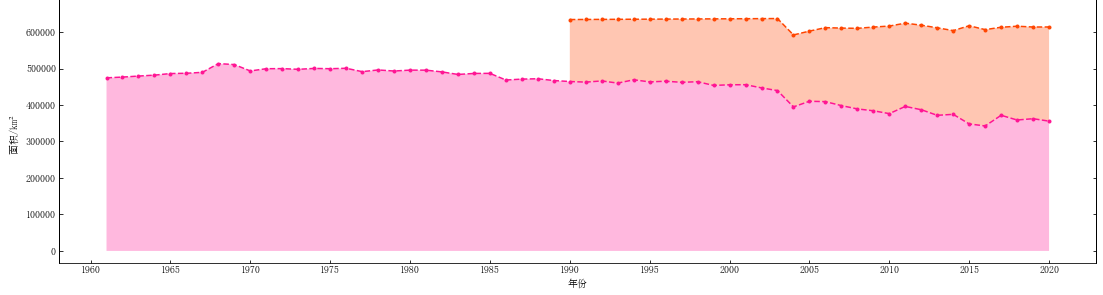

<Figure size 432x288 with 0 Axes>

In [42]:
#画图

#设置长宽
plt.figure(num=3,figsize=(18,5))

#设置坐标轴箭头
import mpl_toolkits.axisartist as axisartist
#创建画布
fig = plt.figure(figsize=(18,5))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax1 = axisartist.Subplot(fig, 111)
#将绘图区对象添加到画布中
fig.add_axes(ax1)
#通过set_axisline_style方法设置绘图区的底部及左侧坐标轴样式
#"-|>"代表实心箭头："->"代表空心箭头
# ax1.axis["bottom"].set_axisline_style("->", size = 1.5)
ax1.axis["left"].set_axisline_style("->", size = 1.5)
ax1.axis["right"].set_axisline_style("->", size = 1.5)
#通过set_visible方法设置绘图区的顶部及右侧坐标轴隐藏
ax1.axis["top"].set_visible(False)
# ax1.axis["right"].set_visible(False)

#设置坐标轴x,y
ax1 = plt.gca()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
plt.gcf().subplots_adjust(left=0.1,top=0.8,bottom=0.09) 

#绘制折线图
al_pl,=plt.plot(al_yar,al_var,'.--',label='0℃持续时间',color='#FF1493')
ol_pl,=plt.plot(ol_yar,ol_1990var+al_var[29:],'.--',label='5℃持续时间',color='#FF4500')
# print(ol_var)

#填充区域
plt.fill_between(al_yar, y1=0, y2=(al_var), facecolor='#FF1493', alpha=0.3)
plt.fill_between(ol_yar, y1=al_var[29:], y2=ol_1990var+al_var[29:], facecolor='#FF4500', alpha=0.3)

#设置坐标轴标注
plt.xlabel('年份')
plt.ylabel('面积/km$^{2}$')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.xticks(np.arange(1960,2021,5,dtype=None))
plt.yticks(np.arange(0,650000,100000,dtype=None))

#保存图片
plt.savefig(figname, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

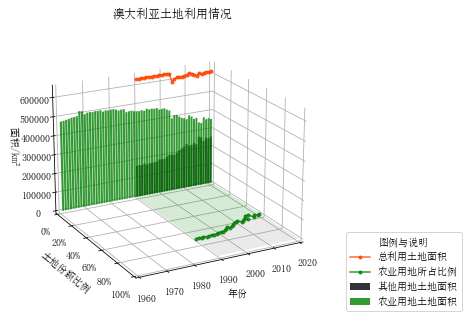

In [43]:
#绘制3d效果+地图
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# al_3dpl=ax3d1.plot(al_yar, al_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
ol_3dpl=ax3d1.plot(ol_yar, ol_1990var+al_var[29:], zs=0, zdir='y',color='#FF4500',marker='.', alpha=0.8,label='总利用土地面积')

#绘制柱状图
# al_3dbar=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar2=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='black', alpha=0.8,label='其他用地土地面积')
al_3dbar=ax3d1.bar(al_yar, al_var, zs=0, zdir='y', color='g', alpha=0.8,label='农业用地土地面积')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('土地份额比例')
ax3d1.set_zlabel('面积/km$^{2}$')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((1960.,2020))
ax3d1.set_ylim ((-1,0))
ax3d1.set_zlim ((0,650000))
plt.xticks(np.arange(1960,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)


#绘制百分比图
al_3dper=ax3d1.plot(al_yar[29:], np.zeros(31), -al_perdf, zdir='y',color='g',marker='.', alpha=0.8,label='农业用地所占比例')
# ol_3dper=ax3d1.plot(al_yar[29:], np.zeros(31),  -al_perdf-ol_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# al_3dbar=ax3d1.bar(ol_perdf, ol_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar=ax3d1.bar(al_yar[29:], -al_perdf, zs=0, zdir='z', color='g', alpha=0.2)
al_3dbar=ax3d1.bar(al_yar[29:], -ol_perdf, zs=0, zdir='z', color='gray', alpha=0.2,bottom=-al_perdf)

#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚土地利用情况")

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
# plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

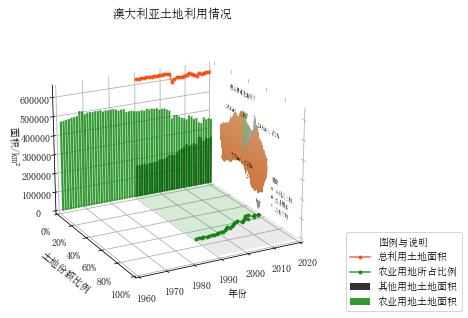

In [41]:
#绘制3d效果+地图
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# al_3dpl=ax3d1.plot(al_yar, al_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
ol_3dpl=ax3d1.plot(ol_yar, ol_1990var+al_var[29:], zs=0, zdir='y',color='#FF4500',marker='.', alpha=0.8,label='总利用土地面积')

#绘制柱状图
# al_3dbar=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar2=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='black', alpha=0.8,label='其他用地土地面积')
al_3dbar=ax3d1.bar(al_yar, al_var, zs=0, zdir='y', color='g', alpha=0.8,label='农业用地土地面积')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('土地份额比例')
ax3d1.set_zlabel('面积/km$^{2}$')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((1960.,2020))
ax3d1.set_ylim ((-1,0))
ax3d1.set_zlim ((0,650000))
plt.xticks(np.arange(1960,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)


#绘制百分比图
al_3dper=ax3d1.plot(al_yar[29:], np.zeros(31), -al_perdf, zdir='y',color='g',marker='.', alpha=0.8,label='农业用地所占比例')
# ol_3dper=ax3d1.plot(al_yar[29:], np.zeros(31),  -al_perdf-ol_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# al_3dbar=ax3d1.bar(ol_perdf, ol_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar=ax3d1.bar(al_yar[29:], -al_perdf, zs=0, zdir='z', color='g', alpha=0.2)
al_3dbar=ax3d1.bar(al_yar[29:], -ol_perdf, zs=0, zdir='z', color='gray', alpha=0.2,bottom=-al_perdf)

#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚土地利用情况")

#添加地图
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
import cv2
# Read the image with Opencv,通过Opencv读取影像
img = cv2.imread('lc2.png')
# Change the color from BGR to RGB,将颜色从BGR转化到RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Orgird to store data,获取图像的x和y,x指行数,从图片最上方开始为0,y指列数,从最左开始为0
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
# print(x,y)
# In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0。我也不懂为啥有这个
img = img.astype('float32')/255
# gca do not work thus use figure objects inbuilt function.
# Plot data画图，前三项是画图的x坐标，y坐标，z坐标。由于图片的坐标与3d坐标有区别，
#因此  3d的坐标=图片坐标/图片的行数(列数)*坐标轴的范围,
#下图是特殊情况,3d的z坐标从下开始,而图片列坐标从上开始,因此+坐标范围
ax3d1.plot_surface(np.atleast_2d(2020), -y/1037, 650000-x/730*650000,  rstride=1, cstride=1, facecolors=img,shade=False)

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()


[0.9693322  0.96706987 0.96753246 0.9658061  0.96398841 0.96105302
 0.96025913 0.95795079 0.96120049 0.96214246 0.96587434 0.96552524
 0.96966843 0.97010734 0.97248107 0.97075939 0.96946146 0.96613586
 0.96464587 0.96377598 0.96287873 0.96003643 0.95985647 0.95496734
 0.95658096 0.95549376 0.95803788 0.9611081  0.96209838 0.96310156
 0.9624402  0.96479859 0.96240575 0.96154051 0.96322736 0.95828085
 0.95428063 0.95344711 0.94872304 0.94781423 0.94619267 0.9461745
 0.9463595  0.93395897 0.93481218 0.93998319 0.94093216 0.93738826
 0.92840469 0.93100443 0.91901969 0.91734698 0.91497277 0.91371524
 0.90980958 0.91133152 0.91643112 0.91277114 0.91469804 0.91287752]


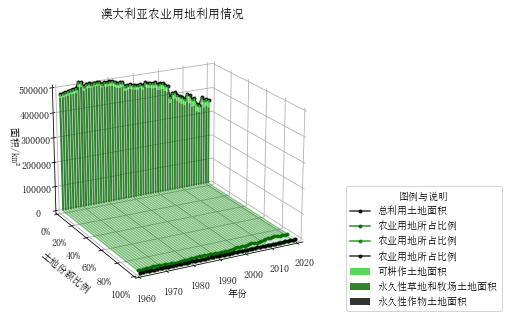

In [88]:
path = 's_ag.csv'

#导入数据
#s_ag是land_cover的缩写,df是数据类型dataframe的缩写
s_ag_df=pd.read_csv(path)
s_ag_ar=np.array(s_ag_df)
# print(s_ag_ar)
#转换成字典dict
s_ag_di=s_ag_df.to_dict()
# print(s_ag_di)
#nic是无索引列no index column的缩写
s_ag_nicdf=pd.read_csv(path,index_col=None)
# print(s_ag)

#筛选数据
#al是土地类型Item中土地类型为农田agriculture land的部分,同理ol
Arable_land_df=s_ag_df[s_ag_df.Item=='Arable land']
Land_under_permanent_crops_df=s_ag_df[s_ag_df.Item=='Land under permanent crops']
Land_under_perm_meadows_and_pastures_df=s_ag_df[s_ag_df.Item=='Land under perm. meadows and pastures']
# print(al)

#制作画图数据

#v代表Value变量
Arable_land_vdf=Arable_land_df.Value
Arable_land_var=np.array(Arable_land_vdf)
# print(Arable_land_vdf)
# print(Arable_land_var)
Land_under_permanent_crops_vdf=Land_under_permanent_crops_df.Value
Land_under_permanent_crops_var=np.array(Land_under_permanent_crops_vdf)
#补齐Land_under_permanent_crops_var的长度
# Land_under_permanent_crops_29var=np.zeros(29)
# Land_under_permanent_crops_var=np.append(Land_under_permanent_crops_29var,Land_under_permanent_crops_1990var)
Land_under_perm_meadows_and_pastures_vdf=Land_under_perm_meadows_and_pastures_df.Value
Land_under_perm_meadows_and_pastures_var=np.array(Land_under_perm_meadows_and_pastures_vdf)

#y代表Year变量
Arable_land_ydf=Arable_land_df.Year
Arable_land_yar=np.array(Arable_land_ydf)

Land_under_permanent_crops_ydf=Land_under_permanent_crops_df.Year
# print(Land_under_permanent_crops_ydf)
Land_under_permanent_crops_yar=np.array(Land_under_permanent_crops_ydf)

Land_under_perm_meadows_and_pastures_ydf=Land_under_perm_meadows_and_pastures_df.Year
# print(Land_under_permanent_crops_ydf)
Land_under_perm_meadows_and_pastures_yar=np.array(Land_under_perm_meadows_and_pastures_ydf)

#计算占比
Arable_land_perdf=Arable_land_var/(Land_under_permanent_crops_var+Arable_land_var+Land_under_perm_meadows_and_pastures_var)*1
Land_under_permanent_crops_perdf=Land_under_permanent_crops_var/(Land_under_permanent_crops_var+Arable_land_var+Land_under_perm_meadows_and_pastures_var)*1
Land_under_perm_meadows_and_pastures_perdf=Land_under_perm_meadows_and_pastures_var/(Land_under_permanent_crops_var+Arable_land_var+Land_under_perm_meadows_and_pastures_var)*1
print(Land_under_perm_meadows_and_pastures_perdf)
# Arable_land_perdf=Arable_land_perdf[29:]
# Land_under_permanent_crops_perdf=Land_under_permanent_crops_perdf[29:]
# print(Land_under_permanent_crops_perdf)
# print(Arable_land_perdf)
# print(Land_under_permanent_crops_perdf)

#导入画图库
from matplotlib import pyplot as plt
from matplotlib import animation
import mpl_toolkits.axisartist as axisartist

#设置字体提前设置
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

#数据的输出路径
figname='土地利用2.jpg'
figname3d='农业用地3d2.jpg'

#绘制3d效果
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# Arable_land_3dpl=ax3d1.plot(Arable_land_yar, Arable_land_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
all_data_3dpl=ax3d1.plot(Land_under_permanent_crops_yar, Land_under_permanent_crops_var+Arable_land_var+Land_under_perm_meadows_and_pastures_var, zs=0, zdir='y',color='k',marker='.', alpha=0.8,label='总利用土地面积')

#绘制柱状图
# Arable_land_3dbar=ax3d1.bar(Land_under_permanent_crops_yar, Land_under_permanent_crops_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=Arable_land_var[29:])
Arable_land_3dbar=ax3d1.bar(Arable_land_yar, Arable_land_var, zs=0, zdir='y', bottom=Land_under_perm_meadows_and_pastures_var,
                                           color='#32CD32', alpha=0.8,label='可耕作土地面积')
Land_under_perm_meadows_and_pastures_var_3dbar=ax3d1.bar(Arable_land_yar, Land_under_perm_meadows_and_pastures_var, zs=0, 
                                                         zdir='y', color='#006400', alpha=0.8,label='永久性草地和牧场土地面积')
Land_under_permanent_crops_3dbar2=ax3d1.bar(Land_under_permanent_crops_yar, Land_under_permanent_crops_var, zs=0, zdir='y',bottom=Land_under_perm_meadows_and_pastures_var+Arable_land_var,
                                            color='black', alpha=0.8,label='永久性作物土地面积')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('土地份额比例')
ax3d1.set_zlabel('面积/km$^{2}$')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((1960,2021))
ax3d1.set_ylim ((-1,0))
ax3d1.set_zlim ((0,500000))
plt.xticks(np.arange(1960,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)


#绘制百分比图
Arable_land_3dper=ax3d1.plot(Arable_land_yar, np.zeros(60), -Land_under_perm_meadows_and_pastures_perdf, zdir='y',color='#006400',
                             marker='.', alpha=0.8,label='农业用地所占比例')
Arable_land_3dper=ax3d1.plot(Arable_land_yar, np.zeros(60), -Land_under_perm_meadows_and_pastures_perdf-Arable_land_perdf, 
                             zdir='y',color='g',marker='.', alpha=0.8,label='农业用地所占比例')
Arable_land_3dper=ax3d1.plot(Arable_land_yar, np.zeros(60),
                             -Land_under_permanent_crops_perdf-Land_under_perm_meadows_and_pastures_perdf-Arable_land_perdf, 
                             zdir='y',color='k',marker='.', 
                             alpha=0.8,label='农业用地所占比例')
# Land_under_permanent_crops_3dper=ax3d1.plot(Arable_land_yar[29:], np.zeros(31),  -Arable_land_perdf-Land_under_permanent_crops_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# Arable_land_3dbar=ax3d1.bar(Land_under_permanent_crops_perdf, Land_under_permanent_crops_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=Arable_land_var[29:])
Arable_land_3dbar=ax3d1.bar(Arable_land_yar, -Land_under_perm_meadows_and_pastures_perdf, 
                            zs=0, zdir='z', color='g', alpha=0.5)
Arable_land_3dbar=ax3d1.bar(Arable_land_yar, -Arable_land_perdf, 
                            zs=0, zdir='z', color='g', alpha=0.2,bottom=-Land_under_perm_meadows_and_pastures_perdf)
Arable_land_3dbar=ax3d1.bar(Arable_land_yar, -Land_under_permanent_crops_perdf, 
                            zs=0, zdir='z', color='gray', alpha=0.2,bottom=-Arable_land_perdf)


#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚农业用地利用情况")

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

[0.85432878 0.85402956 0.8528519  0.85157325 0.8502836  0.84898474
 0.8476748  0.84635925 0.84503252 0.84369649 0.84234922 0.84100336
 0.84221839 0.84342588 0.84462751 0.84581827 0.84700334 0.84821917
 0.8494287  0.85062698 0.85181905 0.85300278 0.85401538 0.85501947
 0.85601914 0.85701309 0.85800271 0.85903645 0.86011737 0.86124307
 0.86241249 0.86362436]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]


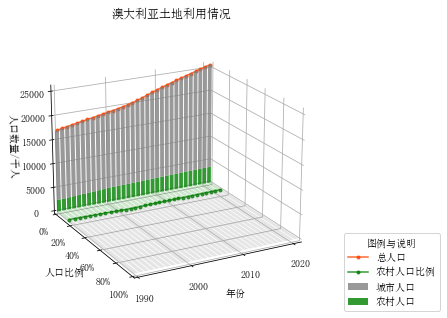

In [105]:
#两种的代码
path = 'people.csv'

#导入数据
#people是land_cover的缩写,df是数据类型dataframe的缩写
people_df=pd.read_csv(path)
people_ar=np.array(people_df)
# print(people_ar)
#转换成字典dict
people_di=people_df.to_dict()
# print(people_di)
#nic是无索引列no index column的缩写
people_nicdf=pd.read_csv(path,index_col=None)
# print(people)

#筛选数据
#al是土地类型Element中土地类型为农田agriculture land的部分,同理ol
Rural_population_df=people_df[people_df.Element=='Rural_population']
Urban_population=people_df[people_df.Element=='Urban_population']
# print(al)

#制作画图数据

#v代表Value变量
Rural_population_vdf=Rural_population_df.Value
Rural_population_var=np.array(Rural_population_vdf)
# print(Rural_population_vdf)
# print(Rural_population_var)

Urban_population_vdf=Urban_population.Value
Urban_population_var=np.array(Urban_population_vdf)
#补齐Urban_population_var的长度
# Urban_population_29var=np.zeros(29)
# Urban_population_var=np.append(Urban_population_29var,Urban_population_1990var)

#y代表Year变量
Rural_population_ydf=Rural_population_df.Year
Rural_population_yar=np.array(Rural_population_ydf)

Urban_population_ydf=Urban_population.Year
# print(Urban_population_ydf)
Urban_population_yar=np.array(Urban_population_ydf)

#计算占比
Rural_population_perdf=Rural_population_var/(Urban_population_var+Rural_population_var)*1
Urban_population_perdf=Urban_population_var/(Urban_population_var+Rural_population_var)*1
# Rural_population_perdf=Rural_population_perdf[29:]
# Urban_population_perdf=Urban_population_perdf[29:]
print(Urban_population_perdf)
# print(Rural_population_perdf)
# print(Urban_population_perdf)

#导入画图库
from matplotlib import pyplot as plt
from matplotlib import animation
import mpl_toolkits.axisartist as axisartist

#设置字体提前设置
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

#数据的输出路径
figname='人口.jpg'
figname3d='人口3d2.jpg'

#绘制3d效果
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# Rural_population_3dpl=ax3d1.plot(Rural_population_yar, Rural_population_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
Urban_population_3dpl=ax3d1.plot(Urban_population_yar, Urban_population_var+Rural_population_var, zs=0, zdir='y',
                                 color='#FF4500',marker='.', alpha=0.8,label='总人口')

#绘制柱状图
# Rural_population_3dbar=ax3d1.bar(Urban_population_yar, Urban_population_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=Rural_population_var[29:])
Rural_population_3dbar2=ax3d1.bar(Urban_population_yar, Urban_population_var, zs=0, zdir='y',color='gray', alpha=0.8,
                                  label='城市人口',bottom=Rural_population_var)
Rural_population_3dbar=ax3d1.bar(Rural_population_yar, Rural_population_var, zs=0, zdir='y', color='g', alpha=0.8,
                                 label='农村人口')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('人口比例')
ax3d1.set_zlabel('人口数量/千人')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((1990,2021))
ax3d1.set_ylim ((-1,0))
# ax3d1.set_zlim ((0,650000))
plt.xticks(np.arange(1990,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)

print(Rural_population_yar)
#绘制百分比图
Rural_population_3dper=ax3d1.plot(Rural_population_yar, np.zeros(32), -Rural_population_perdf, zdir='y',
                                  color='g',marker='.', alpha=0.8,label='农村人口比例')
# Urban_population_3dper=ax3d1.plot(Rural_population_yar[29:], np.zeros(31),  -Rural_population_perdf-Urban_population_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# Rural_population_3dbar=ax3d1.bar(Urban_population_perdf, Urban_population_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=Rural_population_var[29:])
Rural_population_3dbar=ax3d1.bar(Rural_population_yar, -Rural_population_perdf, zs=0, zdir='z', 
                                 color='g', alpha=0.2)
Rural_population_3dbar=ax3d1.bar(Rural_population_yar, -Urban_population_perdf, zs=0, zdir='z', 
                                 color='gray', alpha=0.2,bottom=-Rural_population_perdf)

#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚土地利用情况")

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

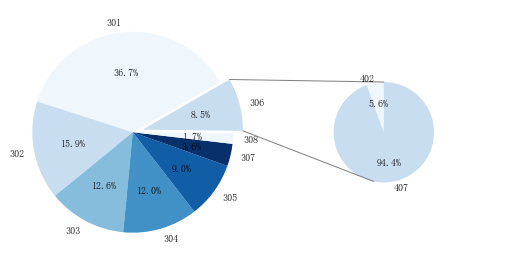

In [90]:
#绘制双饼图
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
from matplotlib import cm
# 大饼图数据
labels = ['301', '302', '303', '304', '305', '307', '308', '306']
size = [219324, 94739, 75146, 71831, 54051, 21458, 9990, 50843]
# 大饼图分裂距离
explode = (0, 0, 0, 0, 0, 0, 0, 0.1)

# 小饼图数据
labels2 = ['402', '407']
size2 = [12255, 207069]
width = 0.2
# 创建画布和子图对象
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 绘制大饼图
ax1.pie(size,
        autopct='%1.1f%%',
        startangle=30,
        labels=labels,
        colors=cm.Blues(range(10, 300, 50)),
        explode=explode)

# 绘制小饼图
ax2.pie(size2,
        autopct='%1.1f%%',
        startangle=90,
        labels=labels2,
        colors=cm.Blues(range(10, 300, 50)),
        radius=0.5,
        shadow=False)

# 连接线1，连接大饼图的上边缘和小饼图的饼块
theta1, theta2 = ax1.patches[-1].theta1, ax1.patches[-1].theta2
center, r = ax1.patches[-1].center, ax1.patches[-1].r
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con1 = ConnectionPatch(xyA=(0, 0.5),
                       xyB=(x, y),
                       coordsA=ax2.transData,
                       coordsB=ax1.transData,
                       axesA=ax2, axesB=ax1)

# 连接线2，连接大饼图的下边缘和小饼图的饼块
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con2 = ConnectionPatch(xyA=(-0.1, -0.49),
                       xyB=(x, y),
                       coordsA='data',
                       coordsB='data',
                       axesA=ax2, axesB=ax1)

# 添加连接线
for con in [con1, con2]:
    con.set_color('gray')
    ax2.add_artist(con)
    con.set_linewidth(1)

# 调整子图布局
fig.subplots_adjust(wspace=0)

# 显示图像
plt.show()


In [1]:
##没有成功的想法

# ax3d1.fill_between(al_yar[29:], y1=np.zeros(31), y2=(-al_perdf), facecolor='#FF1493', alpha=0.3)
# ax3d1.plot_trisurf(al_yar[29:60],-al_perdf+al_yar[29:60]*0 , al_yar[29:60]*0 ,  cmap=plt.get_cmap('rainbow'))
# x=np.linspace(1990,2020,31)
# y=np.linspace(0,-al_perdf,100)
# X, Y = np.meshgrid(x, y)
# ax3d1.plot_surface(X,
#                 Y,
#                 Z=X*0+0,
#                 color='g',
#                 alpha=0.6
#                ) 

# #挪动坐标轴
# ax3d1 = plt.gca()
# ax3d1.xaxis.set_ticks_position('bottom') 
# ax3d1.spines['bottom'].set_position(('data',0))

# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
 


AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

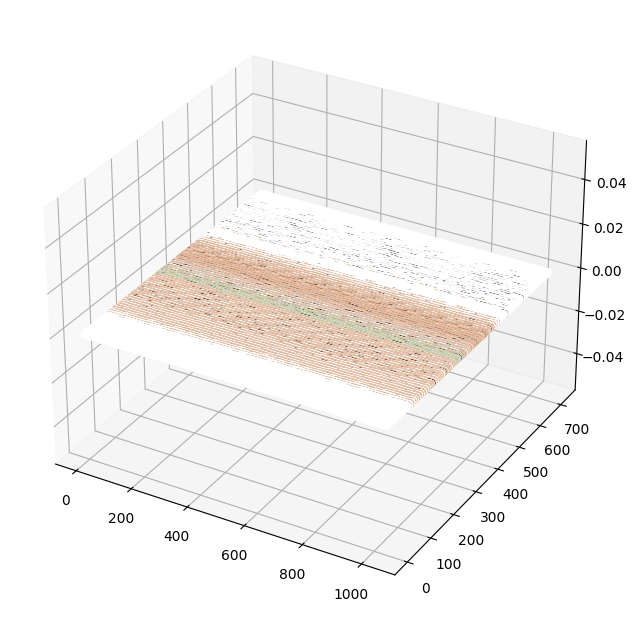

In [10]:
# 据说是比刚刚那个方法更快的方法,但是没有成功

# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
 
# # 创建3D对象
# fig = plt.figure(figsize=(20,8),dpi=100)
# ax = fig.add_subplot(111, projection='3d')
 
# # 读取图片
# img = Image.open('lc2.png')
# pix = img.load()
# # 获取图片长宽
# width = img.size[0]
# height = img.size[1]
# # 创建x,y轴的长度
# x = np.arange(0,width)
# y = np.arange(0,height)
# x,y = np.meshgrid(x,y)
# z = np.zeros(width*height)
# # 建立列表，后期使用
# color = []
# # 遍历长宽，获得每个像素点的RGB值
# for i in range(width):
#     for j in range(height):
#         # 转化rgb为相对占比的元组
#         rgb= tuple(np.array(pix[i, j])/255)
#         color.append(rgb)
 
# # 在z=0的平面上作图
 
# # 设置颜色，像素
# ax.scatter(x,y,z,c = color,alpha = 1)
# plt.show()

In [3]:
#插入图片的另一种方法,但是没有成功
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib._png import read_png
# import matplotlib.image as mpimg
# from matplotlib.cbook import get_sample_data

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# X = np.arange(-5, 5, .25)
# Y = np.arange(-5, 5, .25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.winter,
#                        linewidth=0, antialiased=True)

# ax.set_zlim(-2.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fn = get_sample_data("lc2.png", asfileobj=False)
# arr = read_png(fn)
# # 10 is equal length of x and y axises of your surface
# stepX, stepY = 10. / arr.shape[0], 10. / arr.shape[1]

# X1 = np.arange(-5, 5, stepX)
# Y1 = np.arange(-5, 5, stepY)
# X1, Y1 = np.meshgrid(X1, Y1)
# # stride args allows to determine image quality
# # stride = 1 work slow
# ax.plot_surface(X1, Y1, -2.01, rstride=1, cstride=1, facecolors=arr)

# plt.show()
# # 

ModuleNotFoundError: No module named 'matplotlib_png'

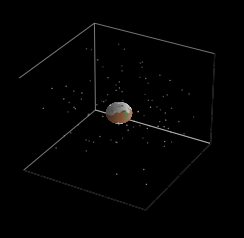

In [5]:
#绘制全球和宇宙的一种效果,可旋转
import PIL
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

bm = PIL.Image.open('lc3.jpg')
bm = np.array(bm.resize([int(d/5) for d in bm.size]))/256.
lons = np.linspace(-180, 180, bm.shape[1]) * np.pi/180 
lats = np.linspace(-90, 90, bm.shape[0])[::-1] * np.pi/180 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.outer(np.cos(lons), np.cos(lats)).T
y = np.outer(np.sin(lons), np.cos(lats)).T
z = np.outer(np.ones(np.size(lons)), np.sin(lats)).T
ax.plot_surface(x, y, z, rstride=4, cstride=4, facecolors = bm)

#Add some stars
x, y, z = 10*(np.random.rand(3,100)-0.5)
ax.scatter(x, y, z, s=0.1, c='w')

#Set backgroudn to black
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

plt.show()


AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

In [ ]:
#绘制3d效果+地图
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# al_3dpl=ax3d1.plot(al_yar, al_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
ol_3dpl=ax3d1.plot(ol_yar, ol_1990var+al_var[29:], zs=0, zdir='y',color='#FF4500',marker='.', alpha=0.8,label='总利用土地面积')

#绘制柱状图
# al_3dbar=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar2=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='black', alpha=0.8,label='其他用地土地面积')
al_3dbar=ax3d1.bar(al_yar, al_var, zs=0, zdir='y', color='g', alpha=0.8,label='农业用地土地面积')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('土地份额比例')
ax3d1.set_zlabel('面积/km$^{2}$')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((1960.,2020))
ax3d1.set_ylim ((-1,0))
ax3d1.set_zlim ((0,650000))
plt.xticks(np.arange(1960,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)


#绘制百分比图
al_3dper=ax3d1.plot(al_yar[29:], np.zeros(31), -al_perdf, zdir='y',color='g',marker='.', alpha=0.8,label='农业用地所占比例')
# ol_3dper=ax3d1.plot(al_yar[29:], np.zeros(31),  -al_perdf-ol_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# al_3dbar=ax3d1.bar(ol_perdf, ol_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar=ax3d1.bar(al_yar[29:], -al_perdf, zs=0, zdir='z', color='g', alpha=0.2)
al_3dbar=ax3d1.bar(al_yar[29:], -ol_perdf, zs=0, zdir='z', color='gray', alpha=0.2,bottom=-al_perdf)

#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚土地利用情况")

#添加地图
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
import cv2
# Read the image with Opencv,通过Opencv读取影像
img = cv2.imread('lc2.png')
# Change the color from BGR to RGB,将颜色从BGR转化到RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Orgird to store data,获取图像的x和y,x指行数,从图片最上方开始为0,y指列数,从最左开始为0
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
# print(x,y)
# In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0。我也不懂为啥有这个
img = img.astype('float32')/255
# gca do not work thus use figure objects inbuilt function.
# Plot data画图，前三项是画图的x坐标，y坐标，z坐标。由于图片的坐标与3d坐标有区别，
#因此  3d的坐标=图片坐标/图片的行数(列数)*坐标轴的范围,
#下图是特殊情况,3d的z坐标从下开始,而图片列坐标从上开始,因此+坐标范围
ax3d1.plot_surface(np.atleast_2d(2020), -y/1037, 650000-x/730*650000,  rstride=1, cstride=1, facecolors=img,shade=False)

#设置视角
ax3d1.view_init(elev=20, azim=-118);

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()